<a href="https://colab.research.google.com/github/aueskinj/Data-Science-Projects/blob/main/Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Setup Complete


In [4]:
df = pd.read_csv("/content/online_retail_customer_churn.csv")

In [5]:
df

Customer_ID  Age  Gender  Annual_Income  Total_Spend  Years_as_Customer  \
0              1   62   Other          45.15      5892.58                  5   
1              2   65    Male          79.51      9025.47                 13   
2              3   18    Male          29.19       618.83                 13   
3              4   21   Other          79.63      9110.30                  3   
4              5   21   Other          77.66      5390.88                 15   
..           ...  ...     ...            ...          ...                ...   
995          996   54    Male         143.72      1089.09                  2   
996          997   19    Male         164.19      3700.24                  9   
997          998   47  Female         113.31       705.85                 17   
998          999   23    Male          72.98      3891.60                  7   
999         1000   34   Other         134.86      3956.71                 15   

     Num_of_Purchases  Average_Transaction_Amount  Num_of_Returns  \
0                  22                      453.80               2   
1                  77                       22.90               2   
2                  71                       50.53               5   
3                  33                      411.83               5   
4                  43                      101.19               3   
..                ...                         ...             ...   
995                29                       77.75               0   
996                90                       34.45               6   
997                69                      187.37               7   
998                31                      483.80               1   
999                48                      420.91               6   

     Num_of_Support_Contacts  Satisfaction_Score  Last_Purchase_Days_Ago  \
0                          0                   3                     129   
1                          2                   3                     227   
2                          2                   2                     283   
3                          3                   5                     226   
4                          0                   5                     242   
..                       ...                 ...                     ...   
995                        3                   2                      88   
996                        4                   4                     352   
997                        3                   1                     172   
998                        2                   5                      55   
999                        0                   1                     269   

     Email_Opt_In Promotion_Response  Target_Churn  
0            True          Responded          True  
1           False          Responded         False  
2           False          Responded          True  
3            True            Ignored          True  
4           False       Unsubscribed         False  
..            ...                ...           ...  
995          True            Ignored         False  
996         False          Responded          True  
997          True       Unsubscribed         False  
998         False          Responded          True  
999          True            Ignored          True  

[1000 rows x 15 columns]

In [6]:
df.shape

(1000, 15)

In [7]:
df.columns

Index(['Customer_ID', 'Age', 'Gender', 'Annual_Income', 'Total_Spend',
       'Years_as_Customer', 'Num_of_Purchases', 'Average_Transaction_Amount',
       'Num_of_Returns', 'Num_of_Support_Contacts', 'Satisfaction_Score',
       'Last_Purchase_Days_Ago', 'Email_Opt_In', 'Promotion_Response',
       'Target_Churn'],
      dtype='object')

In [8]:
df.isna().sum()

Customer_ID                   0
Age                           0
Gender                        0
Annual_Income                 0
Total_Spend                   0
Years_as_Customer             0
Num_of_Purchases              0
Average_Transaction_Amount    0
Num_of_Returns                0
Num_of_Support_Contacts       0
Satisfaction_Score            0
Last_Purchase_Days_Ago        0
Email_Opt_In                  0
Promotion_Response            0
Target_Churn                  0
dtype: int64

In [9]:
df.describe()

Customer_ID          Age  Annual_Income  Total_Spend  \
count  1000.000000  1000.000000    1000.000000   1000.00000   
mean    500.500000    43.267000     111.962960   5080.79265   
std     288.819436    15.242311      52.844111   2862.12335   
min       1.000000    18.000000      20.010000    108.94000   
25%     250.750000    30.000000      67.800000   2678.67500   
50%     500.500000    43.000000     114.140000   4986.19500   
75%     750.250000    56.000000     158.452500   7606.47000   
max    1000.000000    69.000000     199.730000   9999.64000   

       Years_as_Customer  Num_of_Purchases  Average_Transaction_Amount  \
count        1000.000000       1000.000000                 1000.000000   
mean            9.727000         49.456000                  266.876530   
std             5.536346         28.543595                  145.873445   
min             1.000000          1.000000                   10.460000   
25%             5.000000         25.000000                  139.682500   
50%             9.000000         49.000000                  270.100000   
75%            14.000000         74.000000                  401.602500   
max            19.000000         99.000000                  499.570000   

       Num_of_Returns  Num_of_Support_Contacts  Satisfaction_Score  \
count     1000.000000              1000.000000         1000.000000   
mean         4.612000                 1.934000            2.974000   
std          2.896869                 1.402716            1.391855   
min          0.000000                 0.000000            1.000000   
25%          2.000000                 1.000000            2.000000   
50%          5.000000                 2.000000            3.000000   
75%          7.000000                 3.000000            4.000000   
max          9.000000                 4.000000            5.000000   

       Last_Purchase_Days_Ago  
count             1000.000000  
mean               182.890000  
std                104.391319  
min                  1.000000  
25%                 93.000000  
50%                180.500000  
75%                274.000000  
max                364.000000

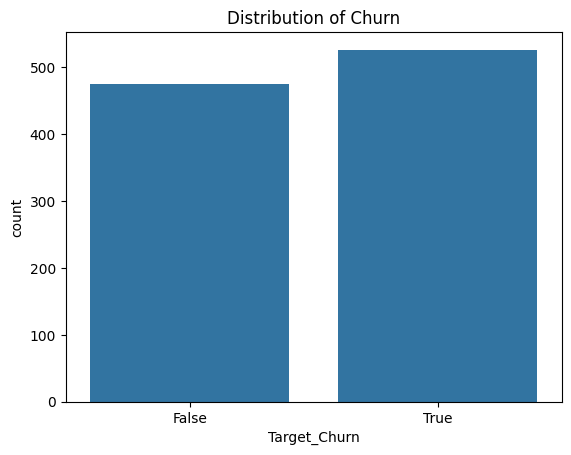

In [10]:
# Explore distribution of the target variable
sns.countplot(x='Target_Churn', data=df)
plt.title('Distribution of Churn')
plt.show()

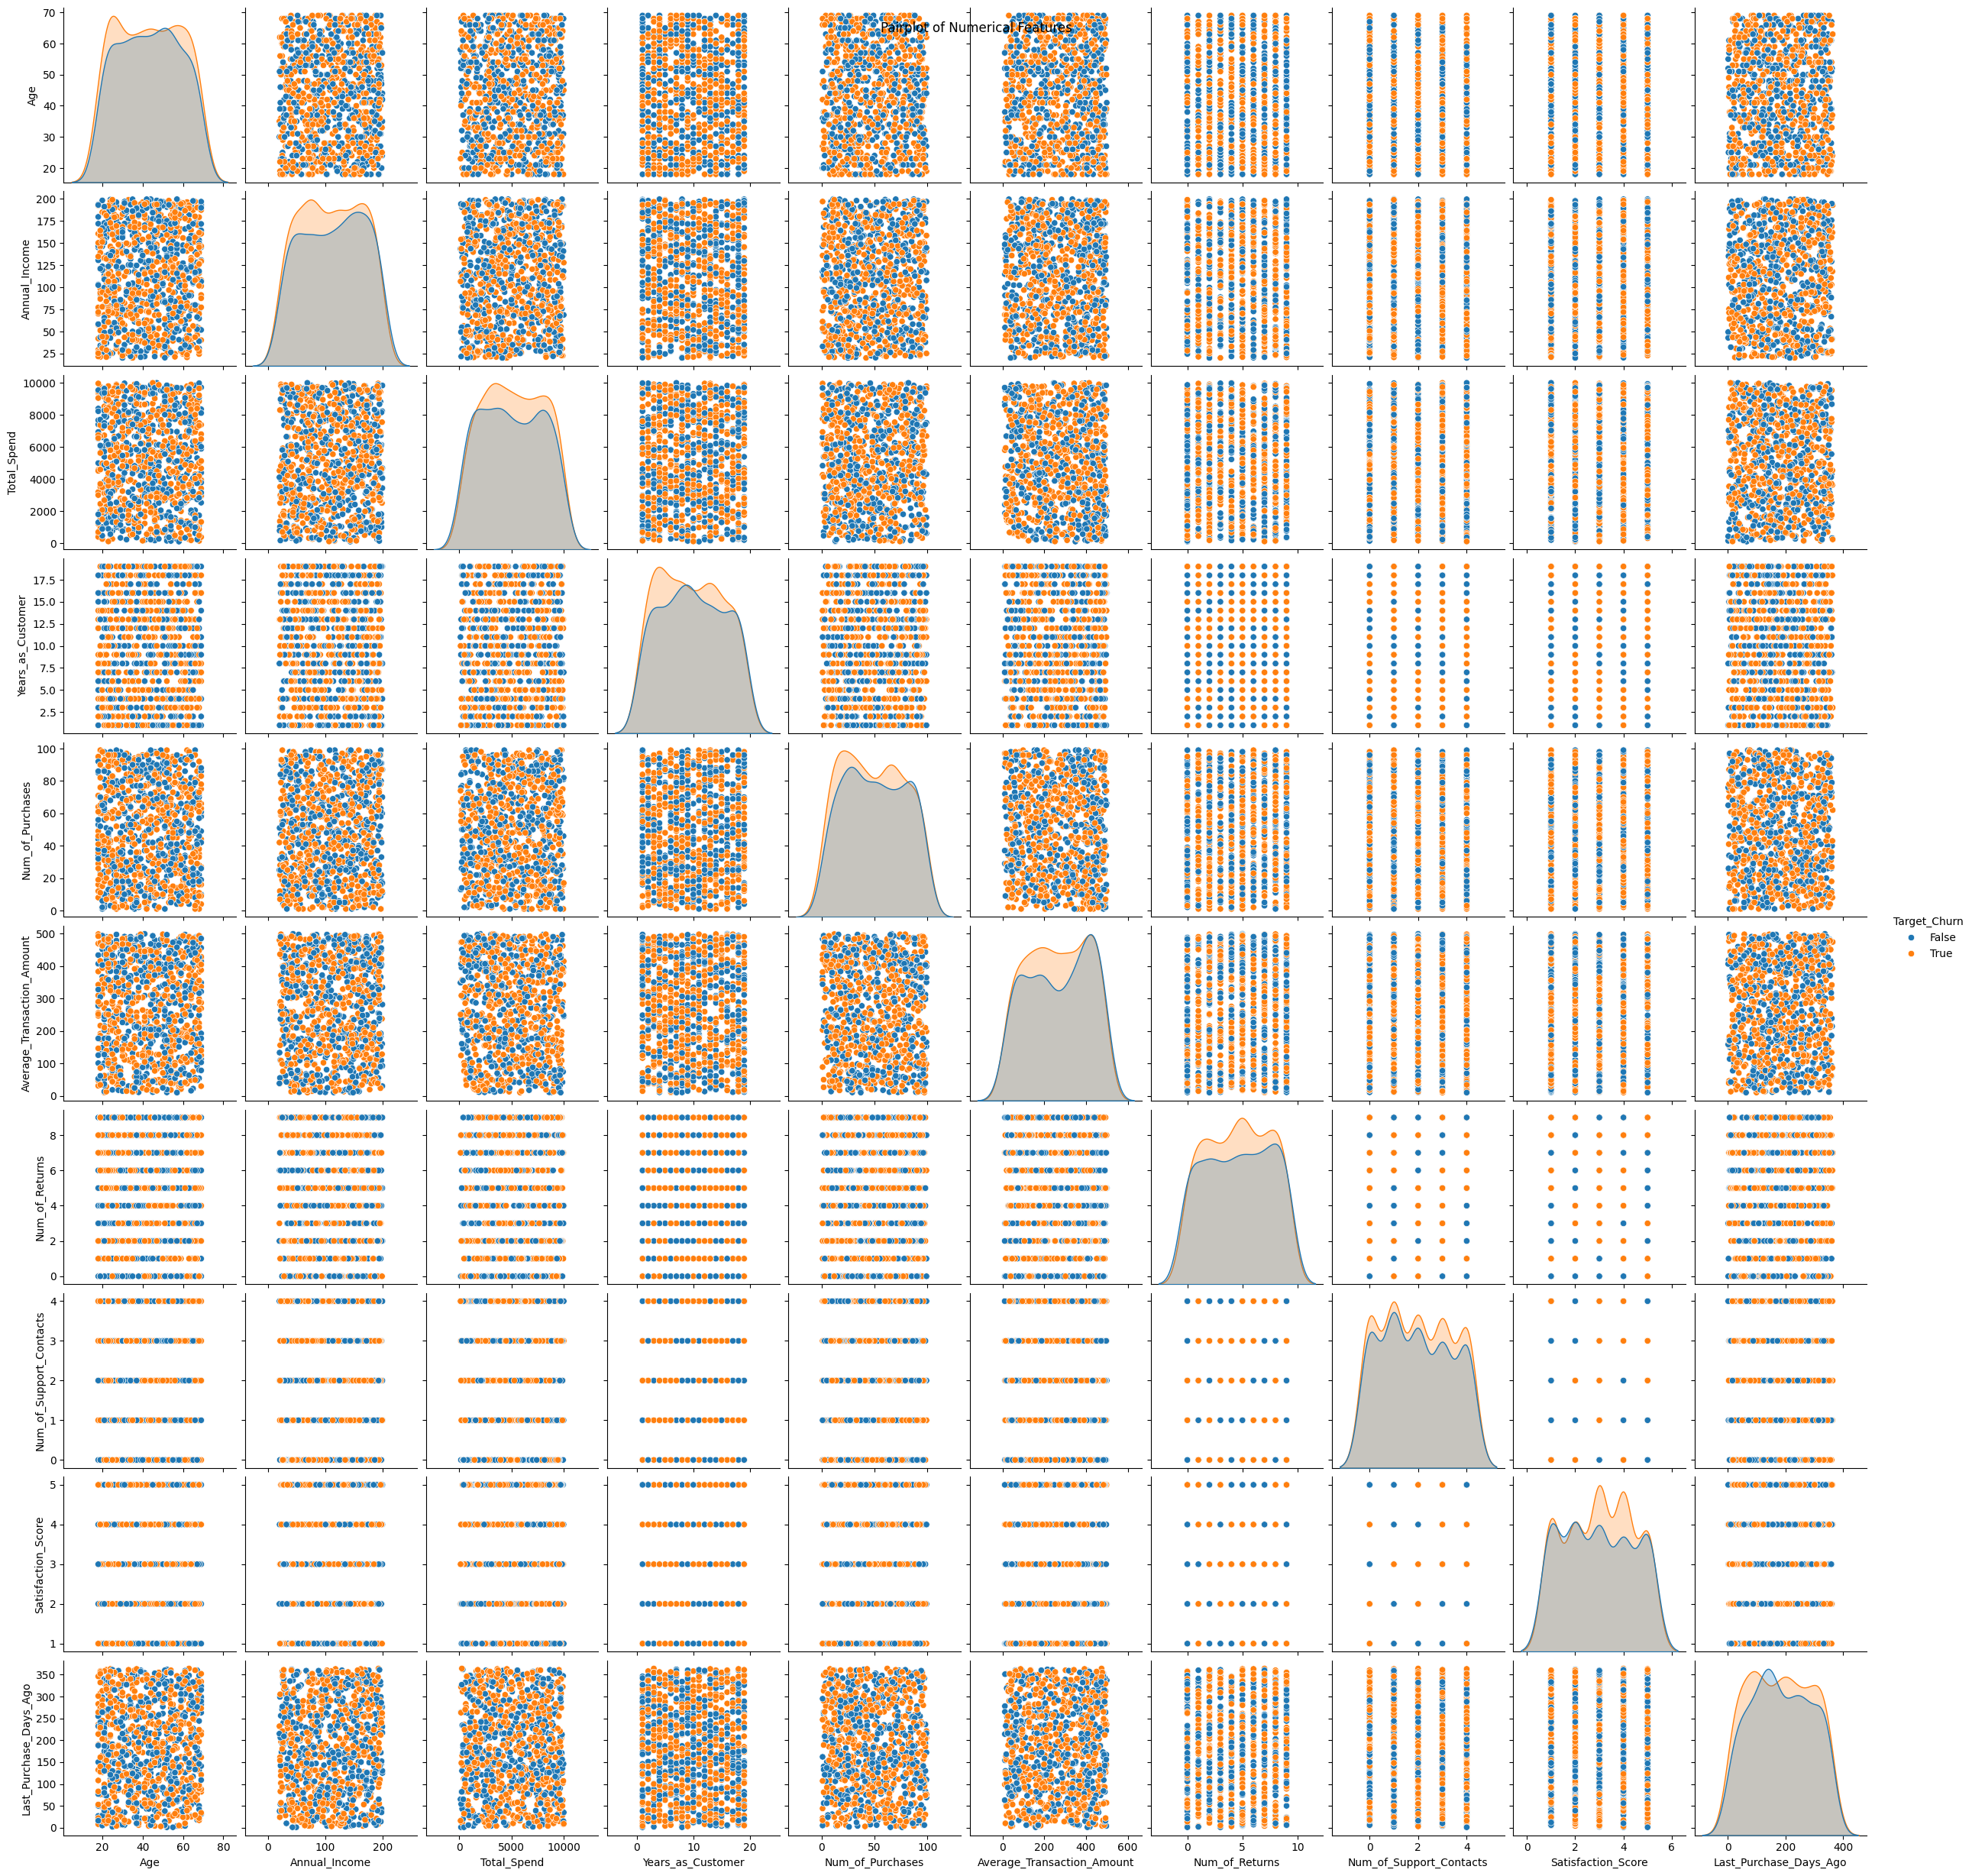

In [11]:
# Explore numerical features
num_features = ['Age', 'Annual_Income', 'Total_Spend', 'Years_as_Customer', 'Num_of_Purchases',
                'Average_Transaction_Amount', 'Num_of_Returns', 'Num_of_Support_Contacts', 'Satisfaction_Score',
                'Last_Purchase_Days_Ago']

# Pairplot for numerical features
sns.pairplot(df, vars=num_features, hue='Target_Churn', diag_kind='kde')
plt.subtitle('Pairplot of Numerical Features')
plt.show()

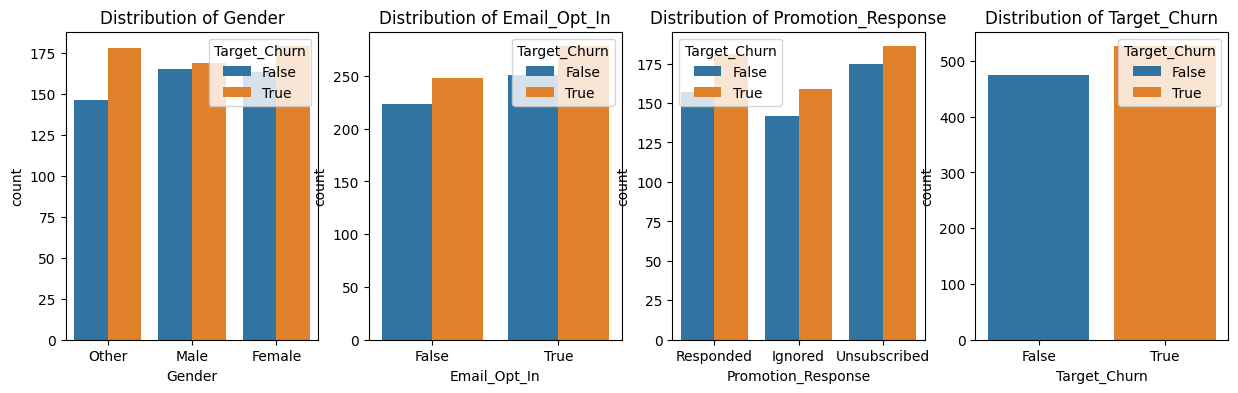

In [12]:
# Explore categorical features
cat_features = ["Gender", "Email_Opt_In", "Promotion_Response", "Target_Churn"]

# Countplot for categorical features
fig, axes = plt.subplots(nrows=1, ncols=len(cat_features), figsize=(15, 4))
for i, feature in enumerate(cat_features):
    sns.countplot(x=feature, hue='Target_Churn', data=df, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')
plt.show()

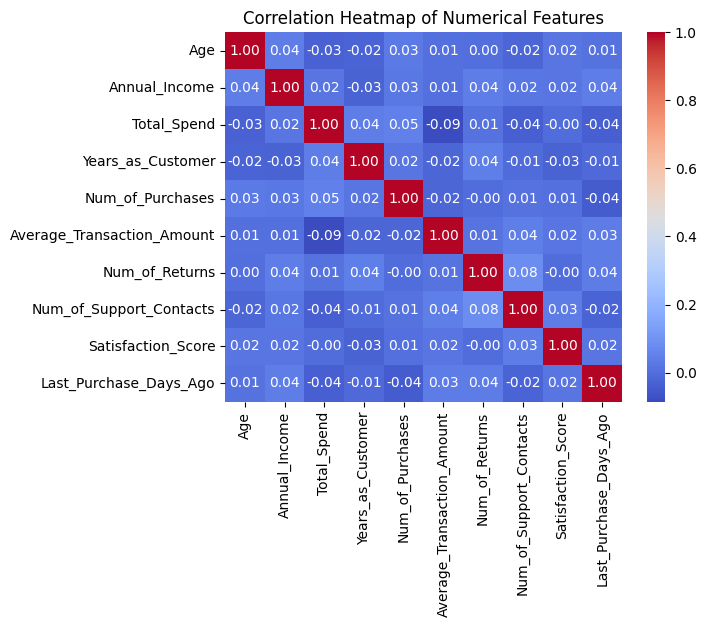

In [13]:
# Correlation heatmap for numerical features
corr_matrix = df[num_features].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


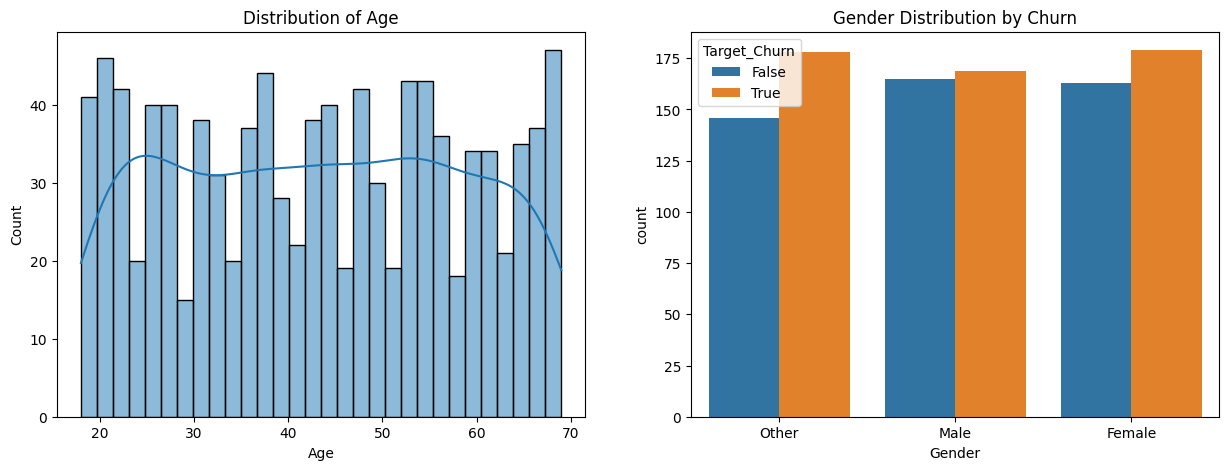

In [14]:
# Explore demographic features
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
# Distribution of Age
sns.histplot(x='Age', data=df, bins=30, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Age')

# Gender distribution
sns.countplot(x='Gender', hue='Target_Churn', data=df, ax=axes[1])
axes[1].set_title('Gender Distribution by Churn')
plt.show()


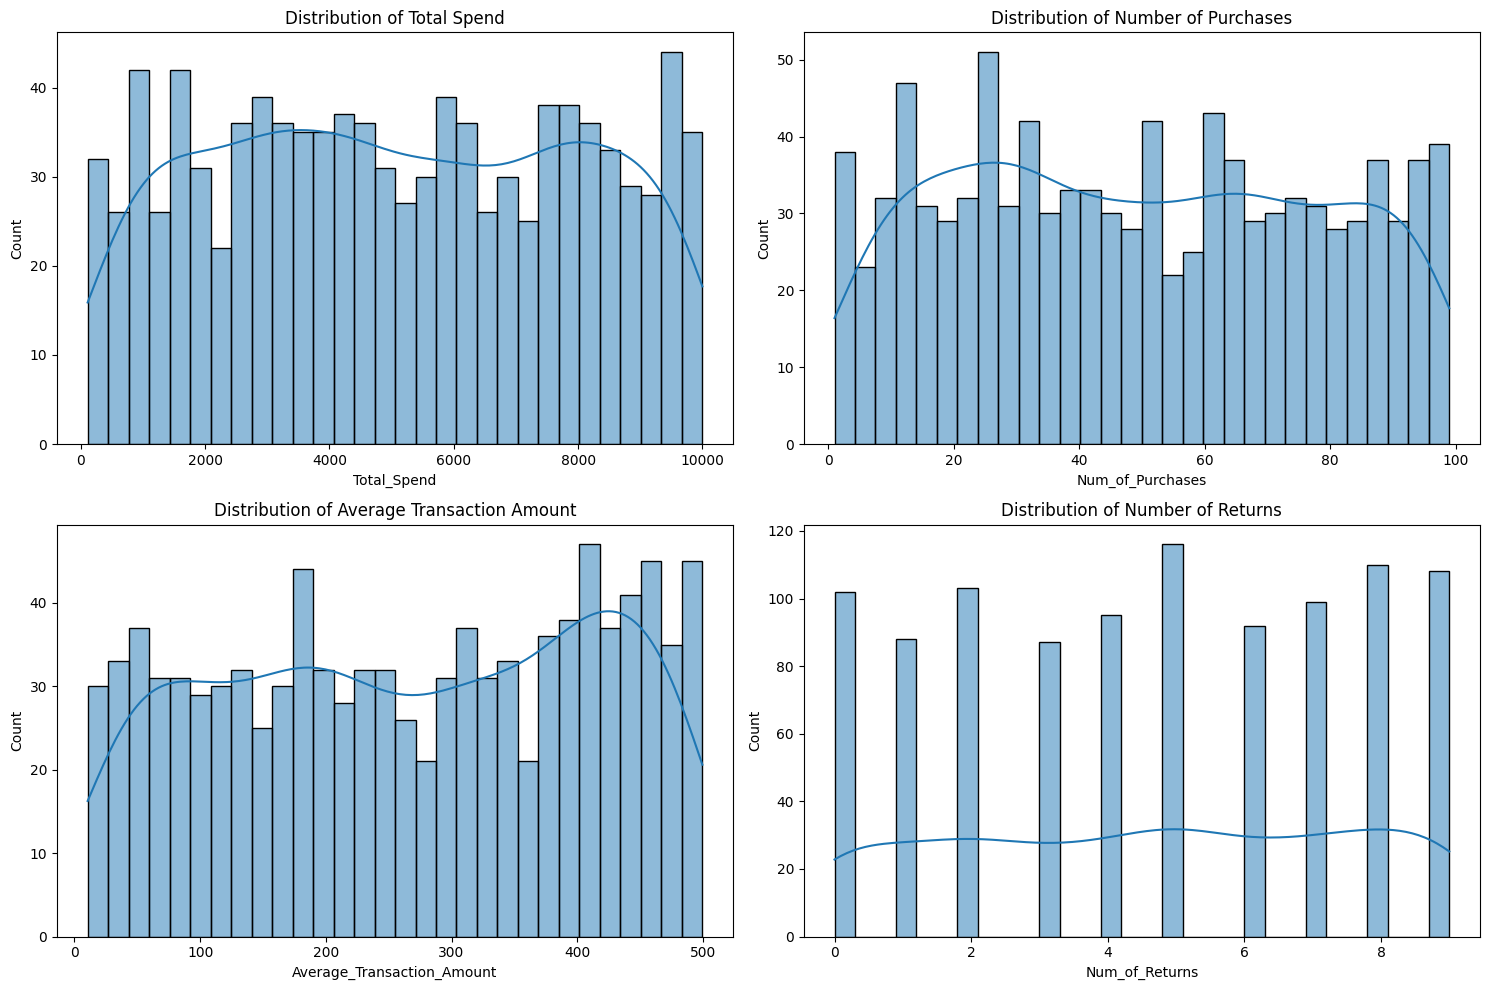

In [15]:
# Spending behavior analysis
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Total Spend distribution
sns.histplot(x='Total_Spend', data=df, bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Total Spend')

# Number of Purchases distribution
sns.histplot(x='Num_of_Purchases', data=df, bins=30, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Number of Purchases')

# Average Transaction Amount distribution
sns.histplot(x='Average_Transaction_Amount', data=df, bins=30, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Average Transaction Amount')

# Number of Returns distribution
sns.histplot(x='Num_of_Returns', data=df, bins=30, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Number of Returns')

plt.tight_layout()
plt.show()


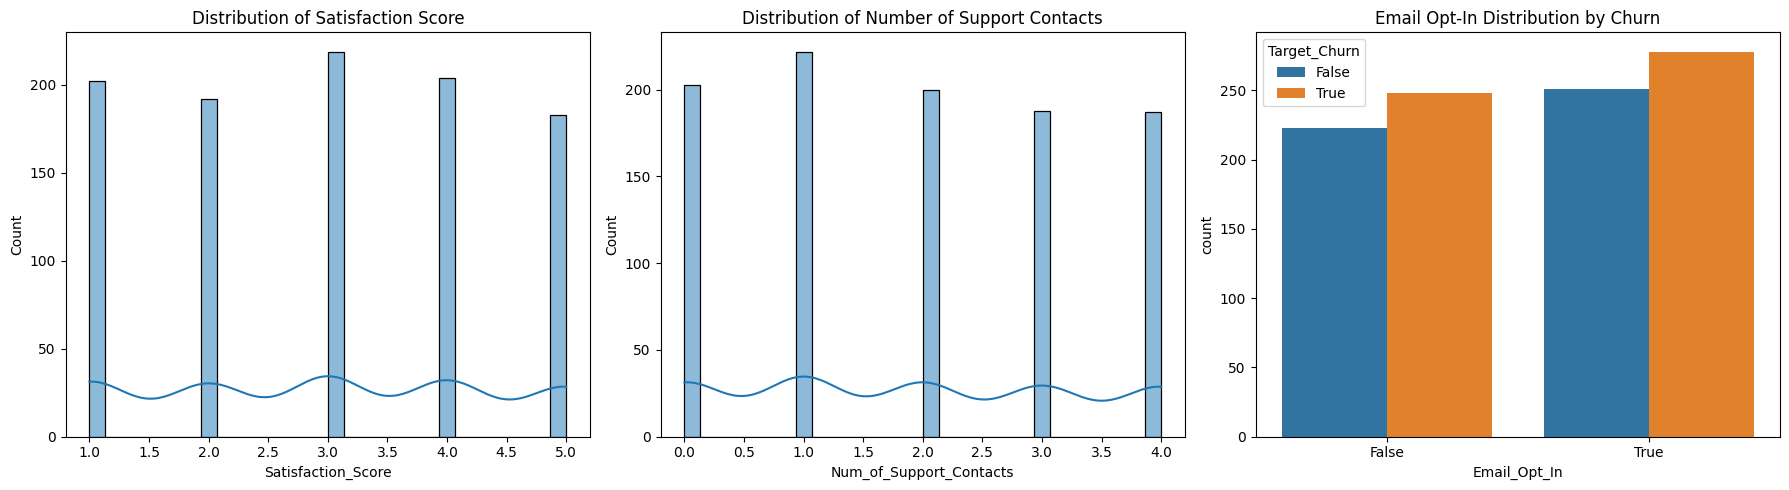

In [16]:
# Customer satisfaction and support interactions
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

# Satisfaction Score distribution
sns.histplot(x='Satisfaction_Score', data=df, bins=30, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Satisfaction Score')

# Number of Support Contacts distribution
sns.histplot(x='Num_of_Support_Contacts', data=df, bins=30, kde=True, ax=axes[1])
axes[1].set_title('Distribution of Number of Support Contacts')

# Email Opt-In and Promotion Response distribution
sns.countplot(x='Email_Opt_In', hue='Target_Churn', data=df, ax=axes[2])
axes[2].set_title('Email Opt-In Distribution by Churn')

plt.tight_layout()
plt.show()

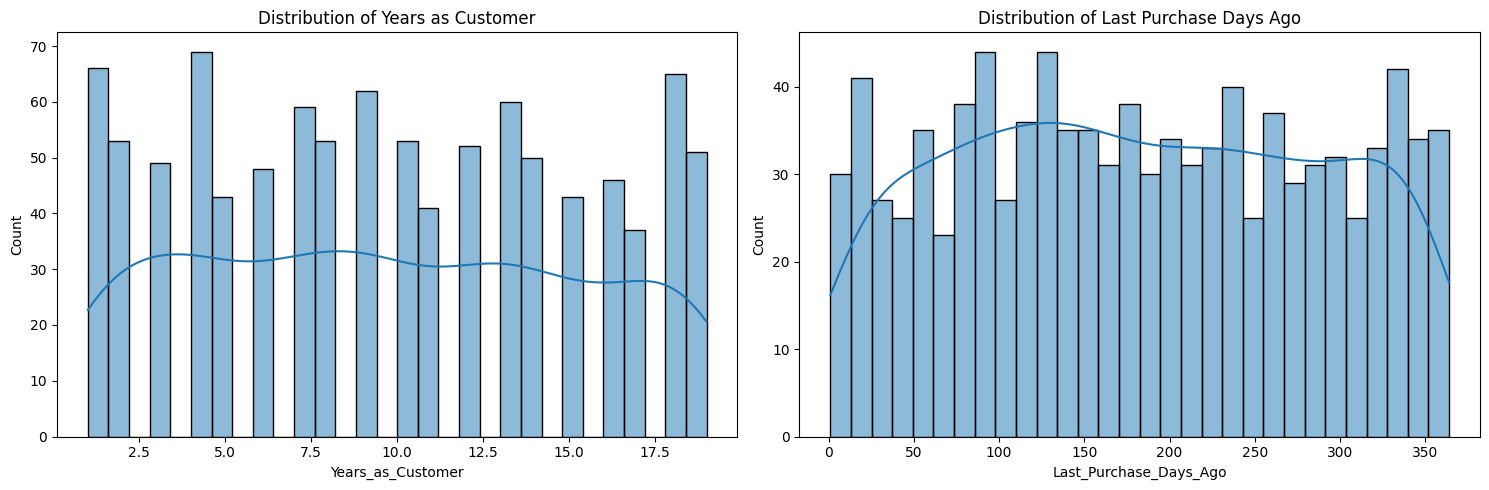

In [17]:
# Time-related features analysis
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Years as Customer distribution
sns.histplot(x='Years_as_Customer', data=df, bins=30, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Years as Customer')

# Last Purchase Days Ago distribution
sns.histplot(x='Last_Purchase_Days_Ago', data=df, bins=30, kde=True, ax=axes[1])
axes[1].set_title('Distribution of Last Purchase Days Ago')

plt.tight_layout()
plt.show()

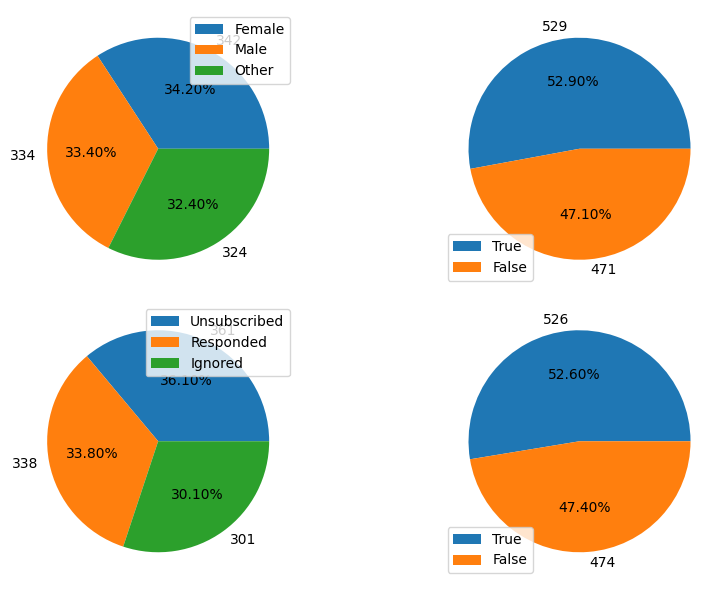

In [18]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))
index = 0
for i in range(2):
    for j in range(2):
        counts = df[cat_features[index]].value_counts()
        axes[i][j].pie(counts, autopct="%0.2f%%", labels=counts)
        axes[i][j].legend(counts.index)
        index += 1

plt.tight_layout()
plt.show()

In [19]:
# Chi-squared tests for categorical features
from scipy.stats import chi2_contingency

cat_features = ['Gender', 'Email_Opt_In', 'Promotion_Response']
for feature in cat_features:
    contingency_table = pd.crosstab(index=df[feature], columns=df['Target_Churn'])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    print(f'Chi-squared test for {feature} and Target_Churn: p-value = {p:.4f}')

Chi-squared test for Gender and Target_Churn: p-value = 0.5336
Chi-squared test for Email_Opt_In and Target_Churn: p-value = 1.0000
Chi-squared test for Promotion_Response and Target_Churn: p-value = 0.8623


In [21]:
df.drop("Customer_ID", axis=1, inplace=True)

In [22]:
categoricals = ["Gender", "Email_Opt_In", "Promotion_Response", "Target_Churn"]

numericals = []
for i in df.columns:
    if i not in categoricals:
        numericals += [i]

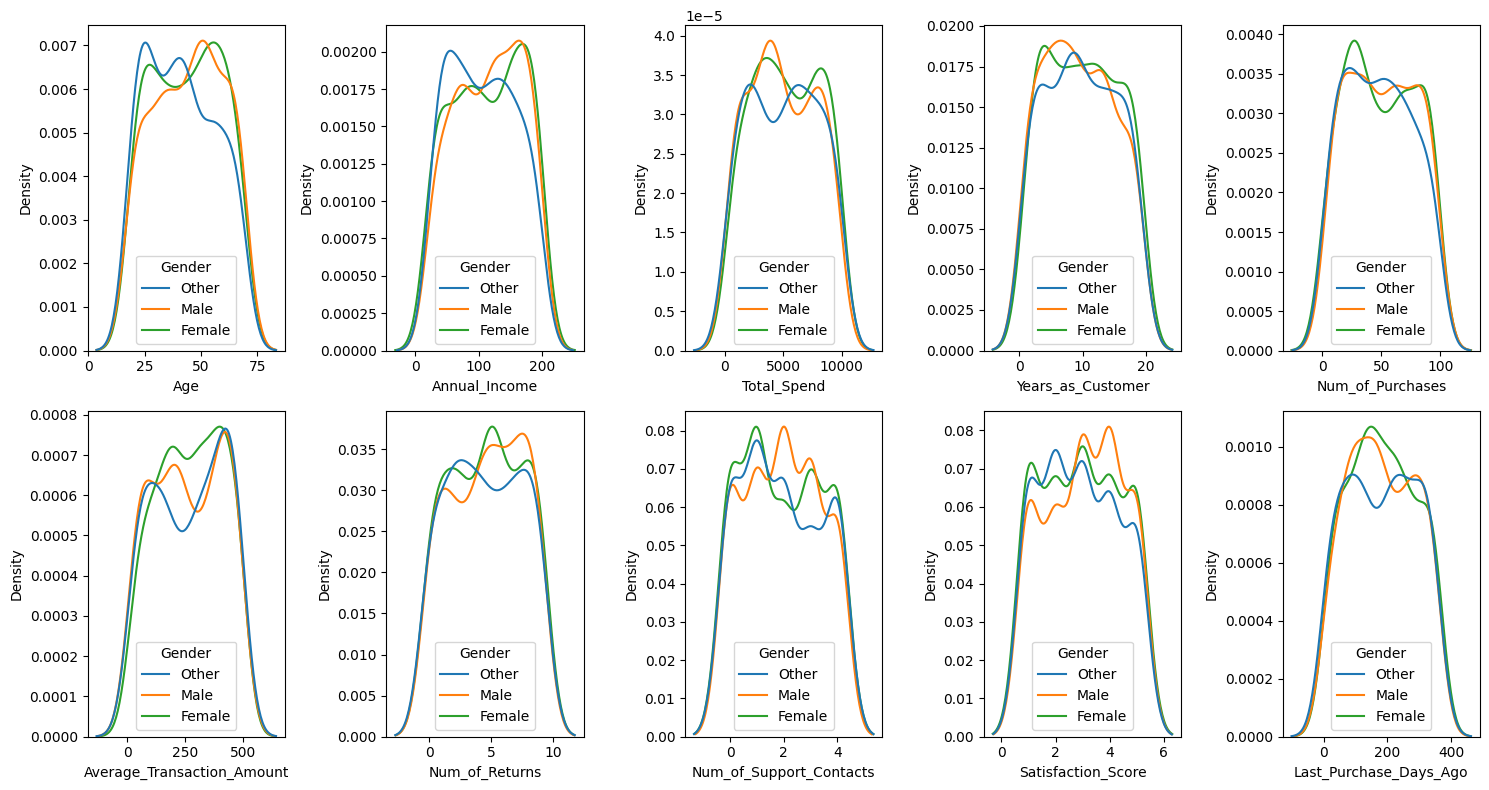

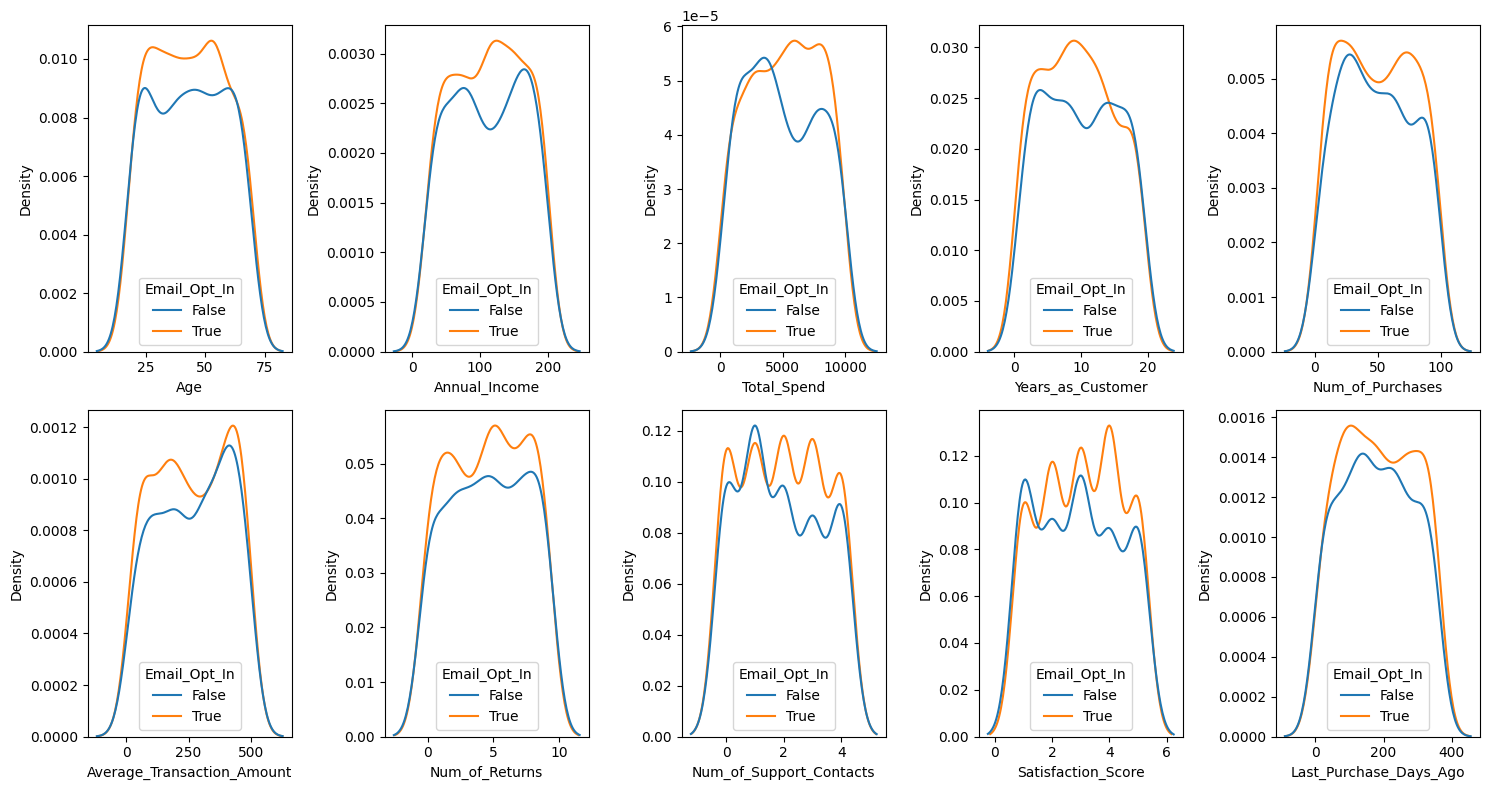

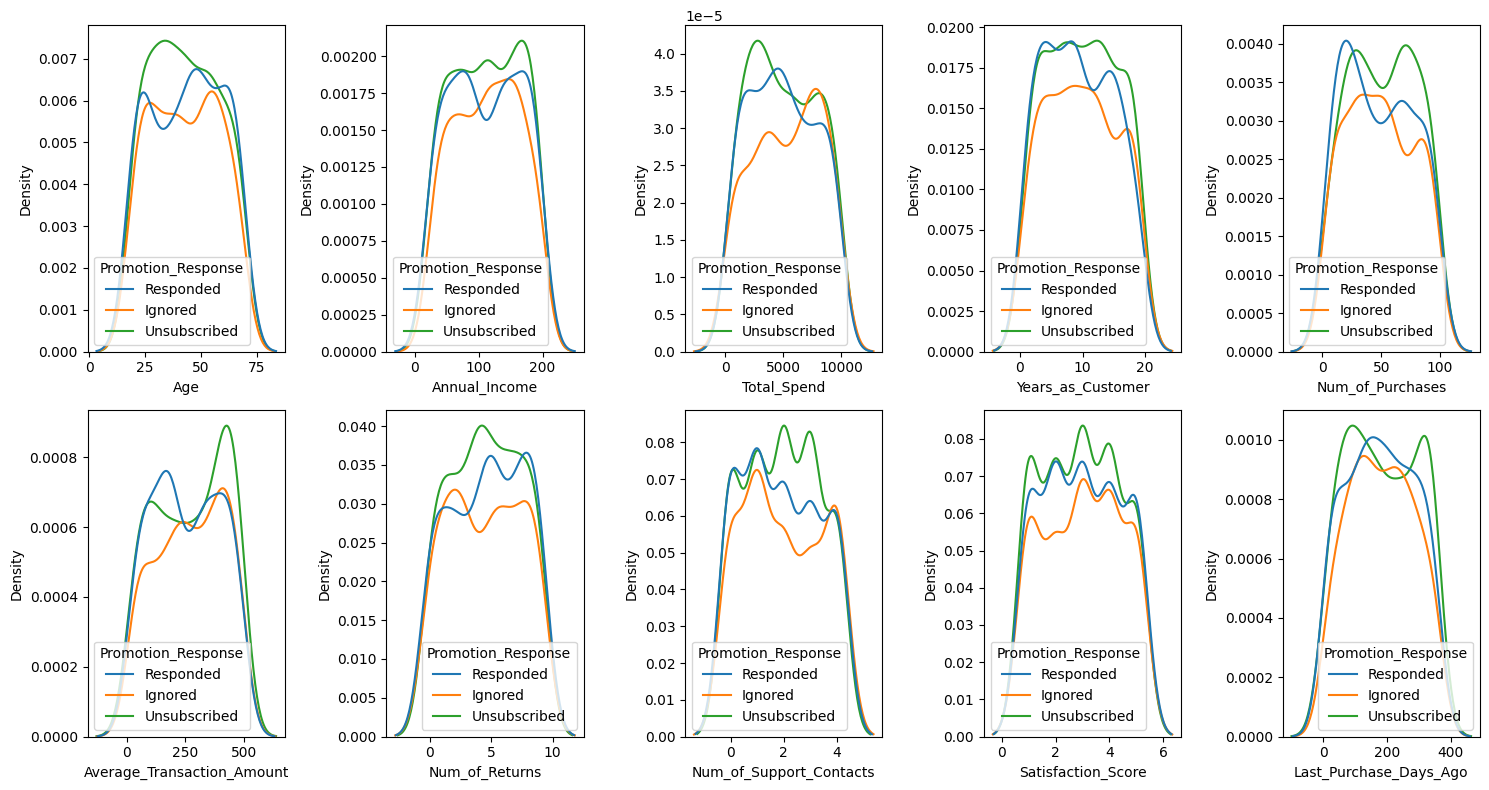

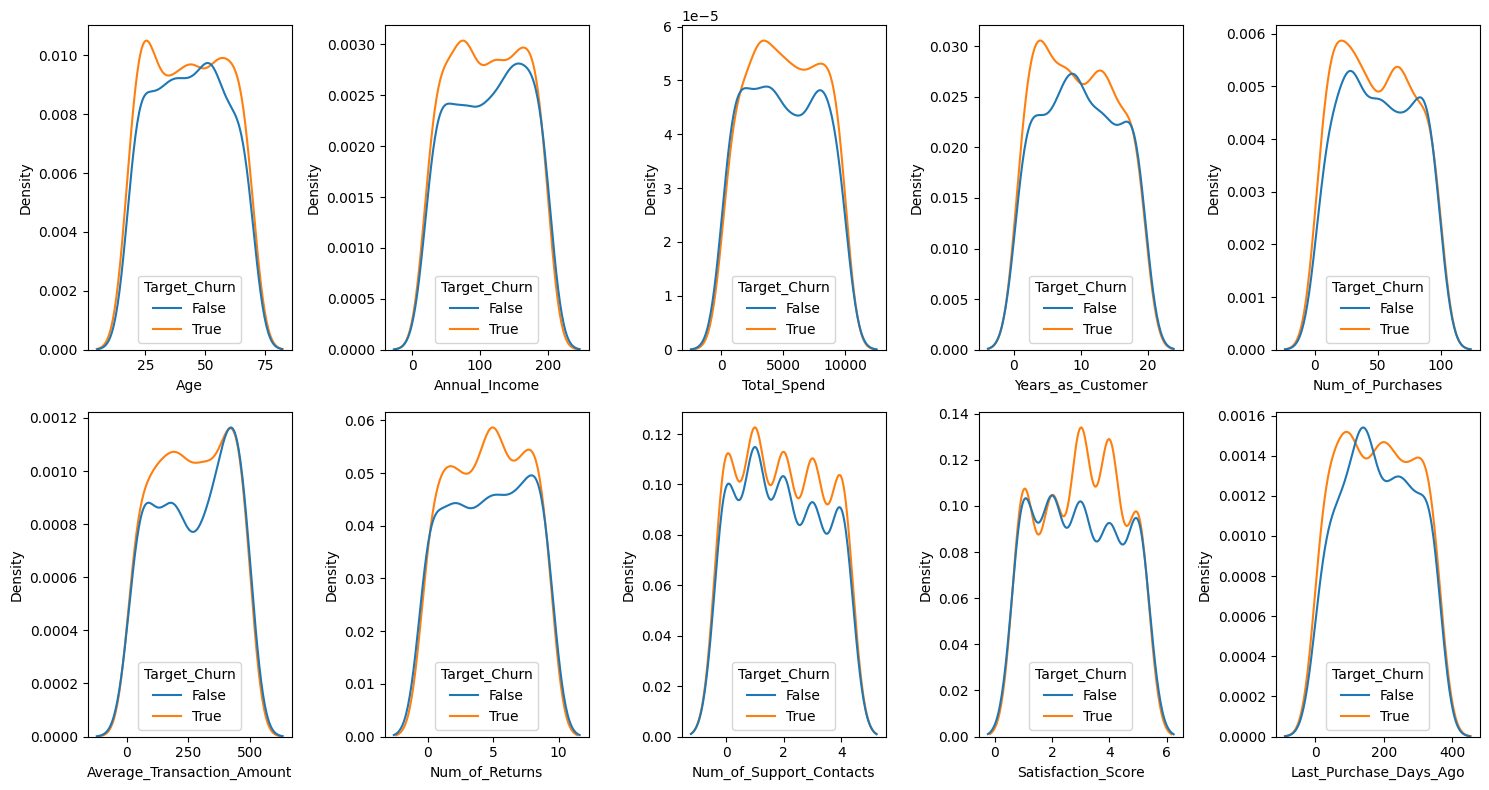

In [23]:
for i in categoricals:
    index = 0
    fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 8))
    for j in range(2):
        for k in range(5):
            sns.kdeplot(df, x=numericals[index], hue=i, ax=axes[j][k])
            index += 1
    plt.tight_layout()
    plt.show()

In [24]:
le = LabelEncoder()
for i in categoricals:
    df[i] = le.fit_transform(df[i])

In [25]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

scaler = MinMaxScaler()
x = scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

In [26]:
def training(model, name, axes):
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    score = accuracy_score(y_test, pred)
    report = classification_report(y_test, pred)
    cm = confusion_matrix(y_test, pred)
    sns.heatmap(cm, annot=True, ax=axes)
    axes.set_title("{}: {}%".format(name, round(score*100, 2)))
    return report

In [27]:
rfc = RandomForestClassifier()
abc = AdaBoostClassifier(learning_rate=0.9)
svc = SVC(C=0.9)
xgb = XGBClassifier(learning_rate=0.9)

models = [rfc, abc, svc, xgb]
names = ["Random Forest", "Ada Boost", "Support Vectors",
        "XGB"]

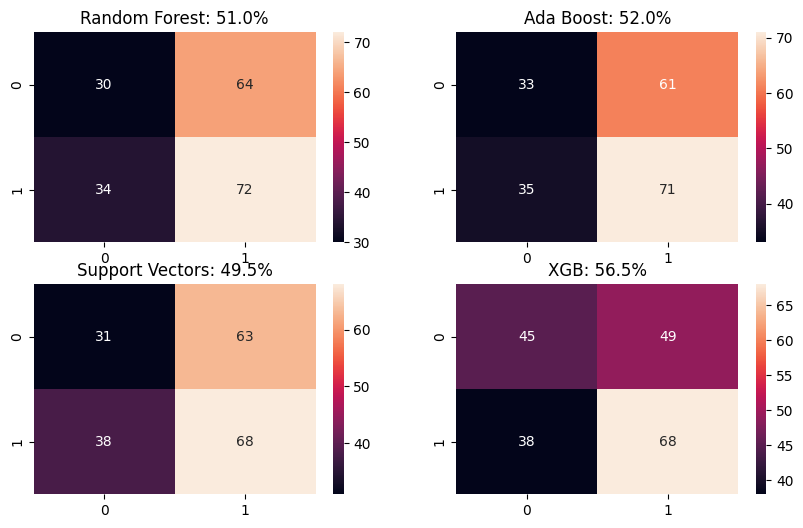

In [28]:
reports = []
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))
row = 0
col = 0
for i, j in zip(models, names):
    if col >= 2:
        row += 1
        col = 0
    reports += [training(i, j, axes[row][col])]
    col += 1

In [29]:
for i, j in zip(names, reports):
    print("*"*50)
    print(i)
    print(j)
    print()

**************************************************
Random Forest
              precision    recall  f1-score   support

           0       0.47      0.32      0.38        94
           1       0.53      0.68      0.60       106

    accuracy                           0.51       200
   macro avg       0.50      0.50      0.49       200
weighted avg       0.50      0.51      0.49       200


**************************************************
Ada Boost
              precision    recall  f1-score   support

           0       0.49      0.35      0.41        94
           1       0.54      0.67      0.60       106

    accuracy                           0.52       200
   macro avg       0.51      0.51      0.50       200
weighted avg       0.51      0.52      0.51       200


**************************************************
Support Vectors
              precision    recall  f1-score   support

           0       0.45      0.33      0.38        94
           1       0.52      0.64      0.5